# **STAR TYPE CLASSIFICATION **
In this project I am going to use every thing I learned from the lectures and 
apply it to the data set to classify different types of stars.

**TARGET**
Type

from 0 to 5

* Red Dwarf - 0
* Brown Dwarf - 1
* White Dwarf - 2
* Main Sequence - 3
* Super Giants - 4
* Hyper Giants - 5

**Variables/Labels**
*   Temperature - K
*   L - L/Lo
*   AM - Mv
*   Color - General Color of Spectrum
*   Spectral_Class - O,B,A,F,G,K,M /  Small Main-Belt Asteroid Spectroscopic Survey SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types
*   Type - Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants 

**MATH CONSTANTS:**

*  Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
*  Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

In [93]:
#Importing libraries for data analysis 
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats


import matplotlib.pyplot as plt

In [94]:
#Importing data 
star=pd.read_csv('/content/sample_data/Stars.csv')
star.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


# **Data Exploration and Data Visualization**

In [95]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [96]:
star.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [97]:
star['Type']

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Type, Length: 240, dtype: int64

In [98]:
star.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

Data **Visualization**

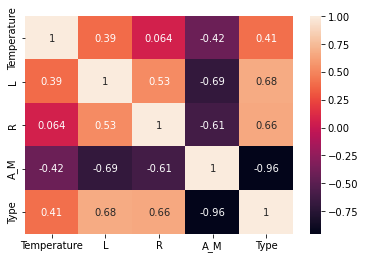

In [99]:
#making a heat map 
sb.heatmap(star.corr(),annot=True)

**Numerical Features**


In [100]:
num_features = [feature for feature in star.columns if star[feature].dtype != 'O' and feature != 'type']

star[num_features].head()

,Temperature,L,R,A_M,Type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0


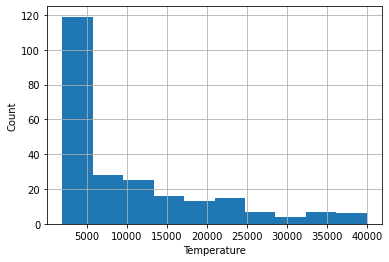

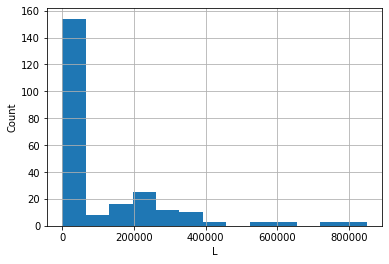

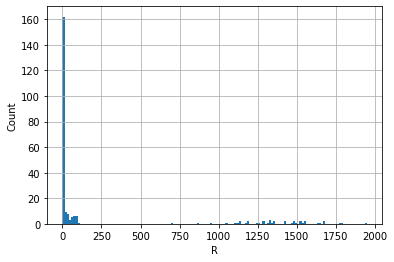

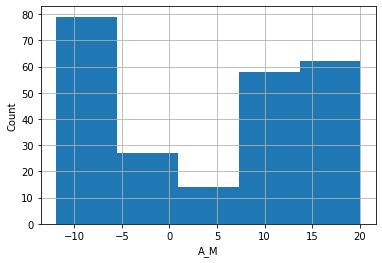

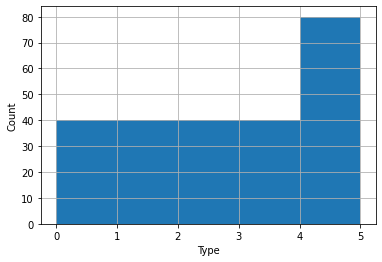

In [101]:
#plotting histograms of features vs types
for feature in num_features:
    iqr = stats.iqr(star[feature], interpolation = 'midpoint')
    h = (2 * iqr) / (len(star[feature]) ** (1/3))
    bins = round((max(star[feature]) - min(star[feature])) / h)
    
    star[feature].hist(bins = bins)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

<Figure size 600x400 with 0 Axes>

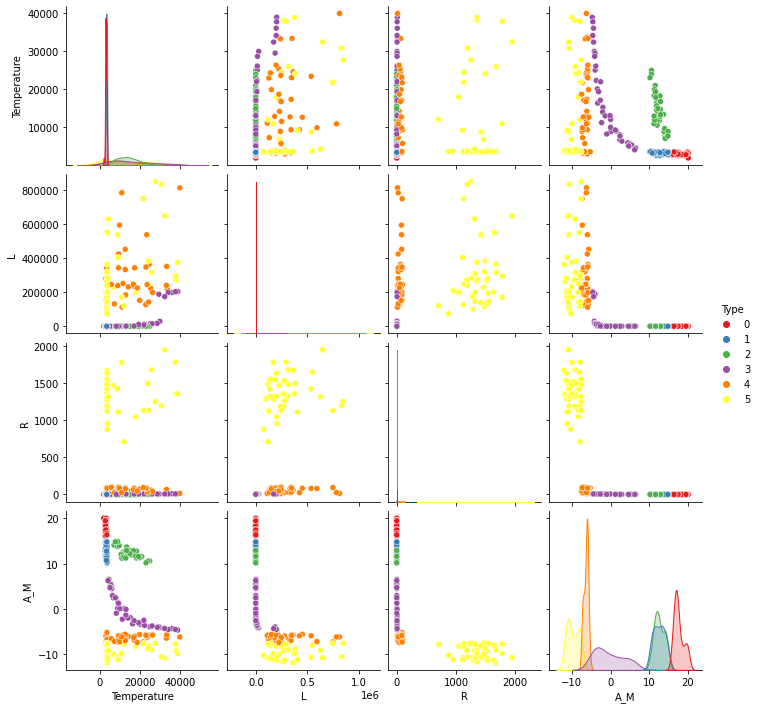

In [102]:
#pairplots
plt.figure(dpi=100)
sb.pairplot(star,hue='Type',palette='Set1',diag_kind='kde')

**Checking for outliers **

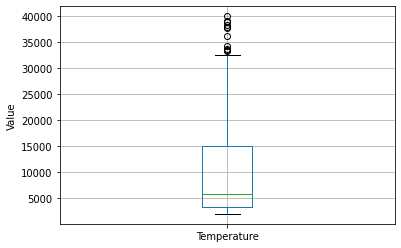

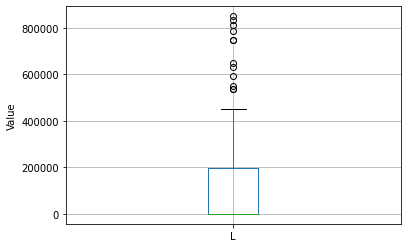

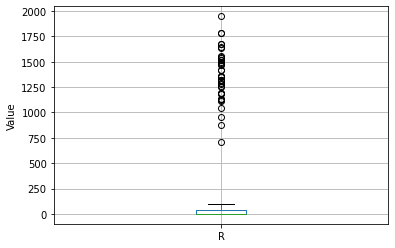

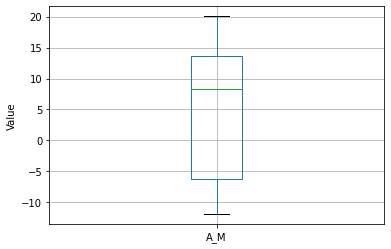

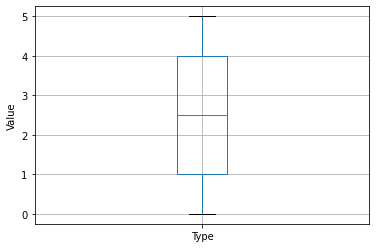

In [103]:
for feature in num_features:
    star.boxplot(column = feature)
    plt.ylabel('Value')
    plt.show()

In [104]:
extreme = star['R'].median() + 0.5 * star['R'].std()

print('values to replace: {}%'.format(len(star.loc[star['R'] > extreme]) * 100 / len(star)))

values to replace: 16.666666666666668%


In [105]:
star['R'] = np.where(star['R'] > extreme, extreme, star['R'])

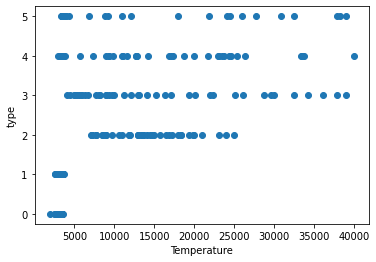

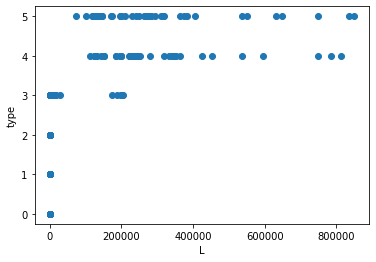

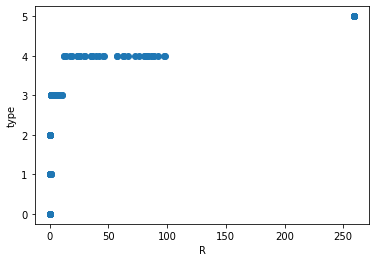

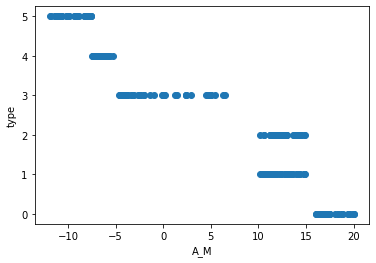

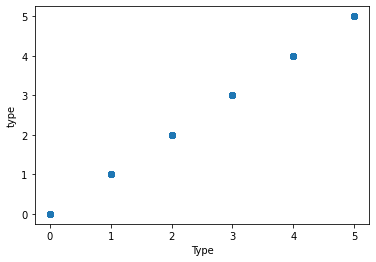

In [106]:
for feature in num_features:
    plt.scatter(star[feature], star['Type'])
    plt.xlabel(feature)
    plt.ylabel('type')
    plt.show()

From the above data plots we can interpret the following:
* If the temperature is less than 5000 degrees, the star will be classified as Type 0 or Type 1:

* If the L value is zero, the star belongs to Type 0, Type 1, or Type 2.

* If the R value is zero, the star belongs to Type 0, Type 1, or Type 2.

* If the R value is greater than 250, the star is classified as Type 5.

* If the AM value is more than 15, the star is classified as Type 0.

* If the AM number is greater than 10 or less than 15, the star is classified as Type 1 or Type 2.

* If the AM value is greater than -5 or less than 10, the star belongs to Type 3.

**MODELLING**

In [107]:
#Importing scikit pakages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report


In [108]:
X=pd.get_dummies(star.drop('Type',axis=1))
y=star['Type']

In [109]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [110]:
#scaling and fitting the data
scaler=StandardScaler()

In [111]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Creating classification models**

In [112]:
#Logistic regression model 
logmod=LogisticRegression()
logmod.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
#KNN classifier model
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [114]:
#random forest classifier model 
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
#gradiant boosting classifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**EVALUATING THE MODEL **

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



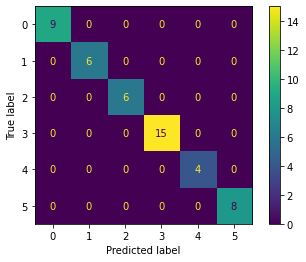

In [116]:
#LOGISTIC REGRESSION 
preds = logmod.predict(X_test)
print(classification_report(preds,y_test))
plot_confusion_matrix(logmod,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.67      0.80         9
           2       0.83      0.83      0.83         6
           3       0.87      0.93      0.90        14
           4       1.00      1.00      1.00         4
           5       0.75      1.00      0.86         6

    accuracy                           0.90        48
   macro avg       0.91      0.90      0.90        48
weighted avg       0.91      0.90      0.89        48



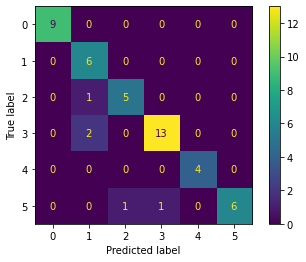

In [117]:
#KNN CLASSIFIER MODEL
preds = knn.predict(X_test)
print(classification_report(preds,y_test))
plot_confusion_matrix(knn,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



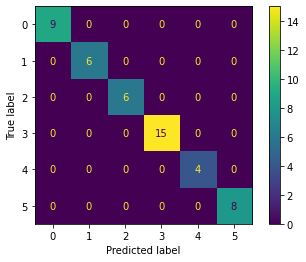

In [118]:
#Random forest classifier
preds = rf.predict(X_test)
print(classification_report(preds,y_test))
plot_confusion_matrix(rf,X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



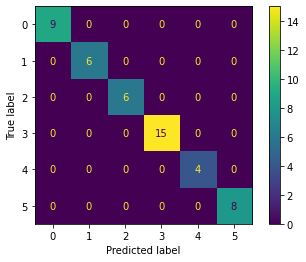

In [119]:
#gradient boosting classifier
preds = gb.predict(X_test)
print(classification_report(preds,y_test))
plot_confusion_matrix(gb,X_test,y_test)

By model evaluation we see that Logistic Regression, Random Forest Classifier and Gradient Boosting Classifier all performed well and any of these can be used for classification of stars.